<h1 align='center'><b><u>Stock Prediction on Real-time Data</u></b></h1>

Open in GOOGLE COLAB <a href='https://githubtocolab.com/VetlaPavanKalyan/Stock-Price-Prediction/blob/main/Notebook/Stock_Price.ipynb'>here</a>

- Import Pandas DataReader Module (*You can also find the complete Documentation <a href='https://pandas-datareader.readthedocs.io/en/latest/'>here</a>*)

In [ ]:
# !pip install pandas-datareader
import pandas_datareader as pdr

- Now for Collecting the Real-time Data we use the Tiingo API (<a href='https://api.tiingo.com/'>here</a>) 
- Follow the steps mentioned in the following file <a href='https://github.com/VetlaPavanKalyan/Stock-Price-Prediction/blob/main/API%20Key%20Generation.md'>here</a>

In [ ]:
key = '' # Update this cell with your API Key

- Now for our Prediction we are using **GOOGLE** Stocks Prediciton
- **GOOGLE** 's STOCK ID according to Tiingo is ```GOOGL```
- For Collecting the Data we use ```get_data_tiingo()``` method

In [ ]:
df = pdr.get_data_tiingo('GOOGL', api_key=key)

/usr/local/lib/python3.8/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


- Create a DataFrame on the Data we Collected

In [ ]:
df.to_csv('./data.csv')

In [ ]:
import pandas as pd
df = pd.read_csv('./data.csv')

- Exploratory Data Analysis

In [ ]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOGL,2018-01-16 00:00:00+00:00,1130.70,1148.88,1126.66,1140.31,1783881,56.5350,57.4440,56.3330,57.0155,35677620,0.0,1.0
1,GOOGL,2018-01-17 00:00:00+00:00,1139.10,1139.32,1123.49,1136.36,1353097,56.9550,56.9660,56.1745,56.8180,27061940,0.0,1.0
2,GOOGL,2018-01-18 00:00:00+00:00,1135.97,1140.59,1124.46,1139.35,1333633,56.7985,57.0295,56.2230,56.9675,26672660,0.0,1.0
3,GOOGL,2018-01-19 00:00:00+00:00,1143.50,1143.78,1132.50,1138.03,1418376,57.1750,57.1890,56.6250,56.9015,28367520,0.0,1.0
4,GOOGL,2018-01-22 00:00:00+00:00,1164.16,1166.88,1141.82,1143.82,1437954,58.2080,58.3440,57.0910,57.1910,28759080,0.0,1.0


In [ ]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1254,GOOGL,2023-01-09 00:00:00+00:00,88.02,90.05,87.8600,88.36,29003901,88.02,90.05,87.8600,88.36,29003901,0.0,1.0
1255,GOOGL,2023-01-10 00:00:00+00:00,88.42,88.67,85.8300,85.98,30467755,88.42,88.67,85.8300,85.98,30467755,0.0,1.0
1256,GOOGL,2023-01-11 00:00:00+00:00,91.52,91.60,89.0100,89.18,26861969,91.52,91.60,89.0100,89.18,26861969,0.0,1.0
1257,GOOGL,2023-01-12 00:00:00+00:00,91.13,91.87,89.7500,91.48,30258135,91.13,91.87,89.7500,91.48,30258135,0.0,1.0
1258,GOOGL,2023-01-13 00:00:00+00:00,92.12,92.19,90.1299,90.85,26329212,92.12,92.19,90.1299,90.85,26329212,0.0,1.0


- We are using the Stock Closing Price (```close```) for Prediciton.

In [ ]:
df1 = df['close']

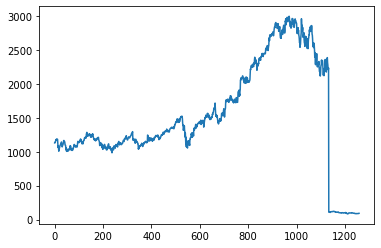

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
import numpy as np

- Our Closing Stock Price is

In [ ]:
print(df1)

0       1130.70
1       1139.10
2       1135.97
3       1143.50
4       1164.16
         ...   
1254      88.02
1255      88.42
1256      91.52
1257      91.13
1258      92.12
Name: close, Length: 1259, dtype: float64


- For Predictons we use ```LSTM``` 's
and also since ```LSTM``` 's are sensitive to Data,
- We need to Scale our Data before predicitons.
- For Now we are using ```MinMaxScaler()```

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df2 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

In [ ]:
df2

array([[0.35947401],
       [0.36235729],
       [0.36128293],
       ...,
       [0.00277688],
       [0.00264301],
       [0.00298283]])

- Let's Set our Training Data be ```65 %``` of the actual data size and Testing Data be remaining ```35 %``` of the actual data size. 

In [ ]:
training_size = int(len(df2)*0.65)
test_size = len(df2) - training_size
training_size, test_size

(818, 441)

In [ ]:
train_data, test_data = df2[: training_size], df2[training_size: ]

In [ ]:
train_data.shape, test_data.shape

((818, 1), (441, 1))

- After we prepared our data, we need to prepare independent (```X```) and dependent (```Y```) features.
- We know that the each (```Y```) is dependent on every (```X```).
- Consider the following data, 
```
data = [t1, t2, t3, t4, t5, ...]
```

In [ ]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i: (i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step][0])
    return np.array(dataX), np.array(dataY)

- Each Time step t<sub>i</sub> depends on t<sub>i-1</sub> Time step.
- We Create our Data for predicitons based on the following example:
- ```X1, X2, X3 -> X4 (Y1)```
- ```X2, X3, X4 -> X5 (Y2)```
and so on...

In [ ]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((717, 100), (717,), (340, 100), (340,))

In [ ]:
X_train, X_test = x_train.reshape(x_train.shape[0], x_train.shape[1], 1), x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

- We are using a ```Stacked LSTM``` as our Model

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile('adam', 'mse')

- Model Structure

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


- Fit our Training Data with ```batch size = 64``` and ```epochs = 100```

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 16s 113ms/step - loss: 0.0467 - val_loss: 0.0741
Epoch 2/100
12/12 [==============================] - 0s 24ms/step - loss: 0.0073 - val_loss: 0.0328
Epoch 3/100
12/12 [==============================] - 0s 19ms/step - loss: 0.0027 - val_loss: 0.0392
Epoch 4/100
12/12 [==============================] - 0s 19ms/step - loss: 0.0019 - val_loss: 0.0336
Epoch 5/100
12/12 [==============================] - 0s 19ms/step - loss: 0.0015 - val_loss: 0.0257
Epoch 6/100
12/12 [==============================] - 0s 18ms/step - loss: 0.0012 - val_loss: 0.0210
Epoch 7/100
12/12 [==============================] - 0s 18ms/step - loss: 9.2440e-04 - val_loss: 0.0181
Epoch 8/100
12/12 [==============================] - 0s 18ms/step - loss: 7.4905e-04 - val_loss: 0.0169
Epoch 9/100
12/12 [==============================] - 0s 18ms/step - loss: 6.4081e-04 - val_loss: 0.0169
Epoch 10/100
12/12 [==============================] - 0s 18ms/step - loss: 6.0294e-04 

- Let's predict our ```train``` and ```test``` data

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 7ms/step


- Let's Inverse the Scaled data using ```inverse_transform()``` from the ```scaler``` object

In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

- Compute the ```RMSE``` Score

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, train_predict, squared=False), mean_squared_error(y_test, test_predict, squared=False)

(1372.6112543315571, 2189.4545463168693)

- Let's Visulaize our Predictions along side with the Actual Data

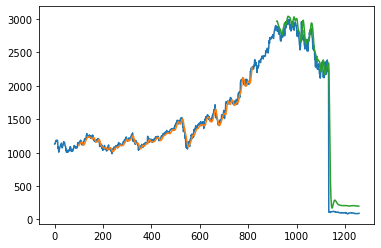

In [ ]:
look_back=time_step
trainPredictPlot = np.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df2)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df2)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df2))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

- See the Predicted and Actual Data are Nearly Equal

In [ ]:
len(test_data)

441

- Now Let's Predict the Future 30 Days Data
- Let's take last 100 Days Data for our future 30 days prediction.

In [ ]:
x_input = test_data[341:].reshape(1, -1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.010445056189802765,
 0.010386703920585993,
 0.011402719902242786,
 0.009236820968373069,
 0.008921032217317576,
 0.008756272868940804,
 0.008509133846375638,
 0.009030871782902093,
 0.008382131848668532,
 0.008025153260518857,
 0.008931329676591125,
 0.008564053629167893,
 0.00934322804753307,
 0.009415310262447907,
 0.00717046414081432,
 0.00740387321768142,
 0.006686483554957538,
 0.006648726204287858,
 0.006741403337749793,
 0.006078933457818174,
 0.005440490982858162,
 0.005735684815366557,
 0.005255136715934285,
 0.005059484989736865,
 0.004829508399294281,
 0.005704792437545909,
 0.00480204850789815,
 0.004194498410758786,
 0.005220811851689128,
 0.006250557779043979,
 0.006178475564129142,
 0.006175043077704626,
 0.005234541797387193,
 0.004953077910576864,
 0.004719668833709764,
 0.00485010331784138,
 0.005364976281518809,
 0.004506854675389756,
 0.005677332546149778,
 0.005951931460111075,
 0.0055606280077162284,
 0.005677332546149778,
 0.0060755009713936575,
 0.00655261658

- Now let's predict the Data for Future 30 days

In [ ]:
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("day-{} input: \n{}".format(i+1,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("day-{} output: \n{}".format(i+1,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.03986782]
101
day-2 input: 
[0.0103867  0.01140272 0.00923682 0.00892103 0.00875627 0.00850913
 0.00903087 0.00838213 0.00802515 0.00893133 0.00856405 0.00934323
 0.00941531 0.00717046 0.00740387 0.00668648 0.00664873 0.0067414
 0.00607893 0.00544049 0.00573568 0.00525514 0.00505948 0.00482951
 0.00570479 0.00480205 0.0041945  0.00522081 0.00625056 0.00617848
 0.00617504 0.00523454 0.00495308 0.00471967 0.0048501  0.00536498
 0.00450685 0.00567733 0.00595193 0.00556063 0.00567733 0.0060755
 0.00655262 0.00722538 0.00394736 0.00301716 0.00441418 0.00380319
 0.00241647 0.0012151  0.         0.00108123 0.00173684 0.00187757
 0.00133524 0.00360754 0.00445537 0.00421166 0.00515216 0.00529289
 0.0051247  0.00480548 0.00417734 0.00467505 0.00515903 0.00481578
 0.0043318  0.0040366  0.00602745 0.00602745 0.00583866 0.00550914
 0.00465102 0.00395079 0.0035286  0.00322654 0.0033913  0.00418763
 0.00399541 0.00255034 0.00234439 0.00171968 0.00191876 0.00211098
 0.00148627 0.00199084 0.00135926

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
len(df2)

1259

- Now Let's visualize the future Prediciton.  

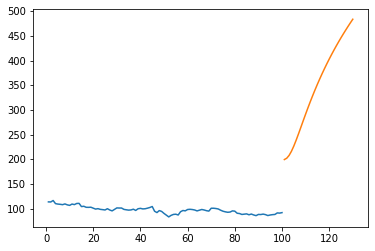

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df2[1159:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

- Now Attach our prediction to the Actual Data and Visualize

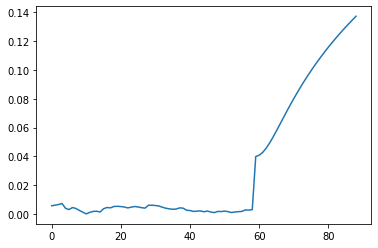

In [ ]:
df3=df2.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

- Visualizing the Whole attached new Data.

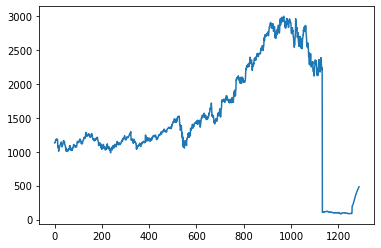

In [ ]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)